# Plotting Metrics from Toil Scaling Tests
Author: John Vivian

This iPython notebook will plot metrics collected from scaling tests. The automation of these scaling tests is handled by [this script](https://github.com/jvivian/one_off_scripts/blob/master/automated_scaling_tests.py), wherein a subset of RNA-seq data is randomly selected and run on a cluster of size N. 

In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
import numpy as np

In [35]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [36]:
runs = []
for root, dirs, files in os.walk('.'):
    runs.extend(dirs)
runs = [x for x in runs if 'scaling' in x]

In [37]:
runs

['06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10',
 '2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100',
 '6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400',
 'c437bdb2-ba2a-42fc-a75d-88587bea93e0_2016-01-30_scaling-gtex-1']

In [38]:
metrics = {}
for r in runs:
    metrics[r.split('_')[-1]] = [os.path.join(r, x) for x in os.listdir(r) if '.csv' in x]

In [39]:
metrics.keys()

['scaling-gtex-100', 'scaling-tcga-10', 'scaling-gtex-400', 'scaling-gtex-1']

2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100/CPUUtilization.csv
2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100/DiskReadOps.csv
2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100/DiskUsage_mnt_ephemeral.csv
2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100/DiskUsage_root.csv
2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100/DiskWriteOps.csv
2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100/MemUsage.csv
2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100/NetworkIn.csv
2c19c57c-0458-4dbb-9bb3-8013f11a8a1b_2016-01-31_scaling-gtex-100/NetworkOut.csv


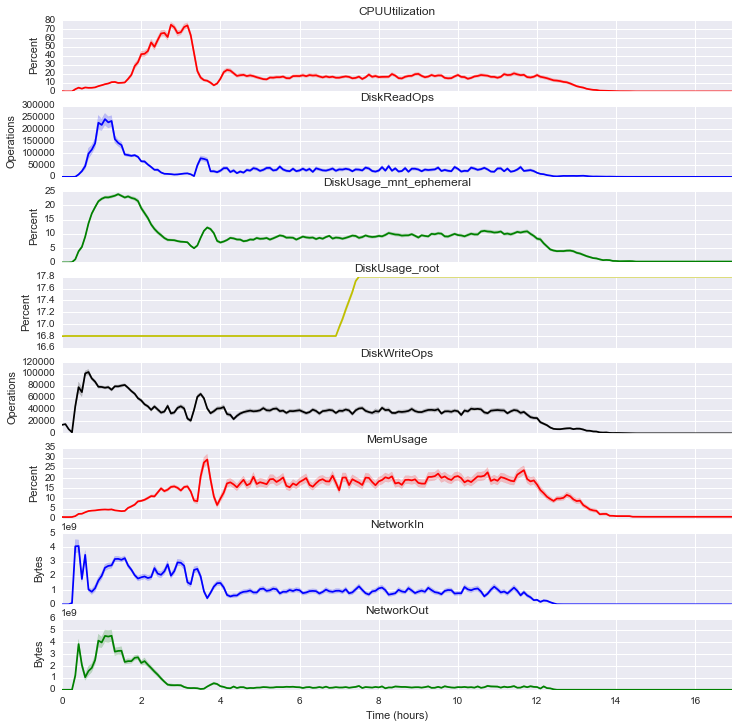

UUID: 2c19c57c-0458-4dbb-9bb3-8013f11a8a1b

Number of Samples: 754

Number of Nodes: 100

Cluster Name: scaling-gtex-100

Source Bucket: gtex-data

Average Hourly Cost: $0.4585

Cost per Instance: $7.87

Availability Zone: us-west-2a

Start Time: 2016-01-31T23:26:29.000Z 

Stop Time:  2016-02-01T16:37:33.000Z

Total Cost of Cluster: 787

Cost Per Sample: $1.04
06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10/CPUUtilization.csv
06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10/DiskReadOps.csv
06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10/DiskUsage_mnt_ephemeral.csv
06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10/DiskUsage_root.csv
06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10/DiskWriteOps.csv
06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10/MemUsage.csv
06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10/NetworkIn.csv
06aaac8b-66ef-4679-822c-6afb879be08a_2016-01-30_scaling-tcga-10

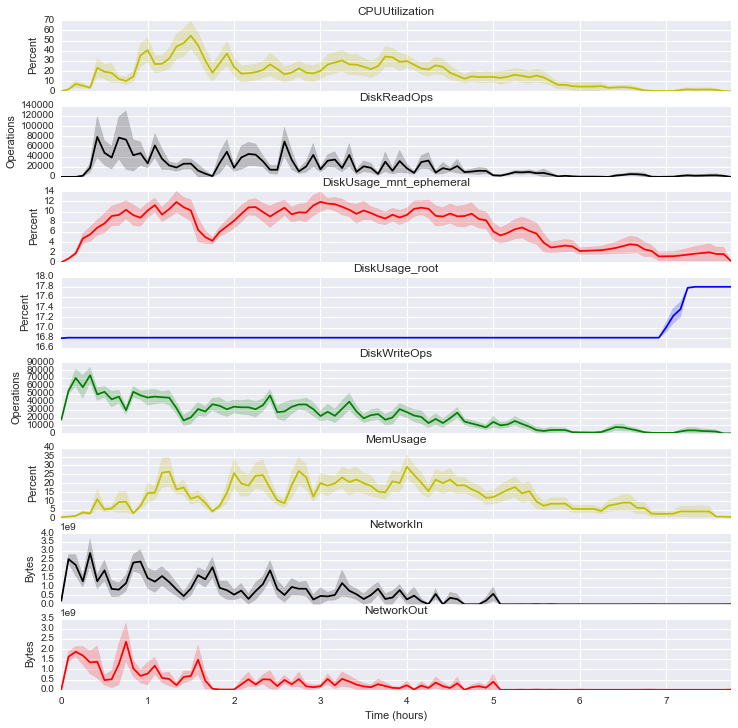

UUID: 06aaac8b-66ef-4679-822c-6afb879be08a

Number of Samples: 23

Number of Nodes: 10

Cluster Name: scaling-tcga-10

Source Bucket: tcga-data-cgl-recompute

Average Hourly Cost: $0.45361010101

Cost per Instance: $3.60355424411

Availability Zone: us-west-2a

Total Cost of Cluster: $36

Cost Per Sample: $1.50
6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400/CPUUtilization.csv
6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400/DiskReadOps.csv
6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400/DiskUsage_mnt_ephemeral.csv
6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400/DiskUsage_root.csv
6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400/DiskWriteOps.csv
6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400/MemUsage.csv
6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400/NetworkIn.csv
6d04a020-dfc1-4b7f-8b93-60d867ec5a49_2016-02-02_scaling-gtex-400/NetworkOut.csv


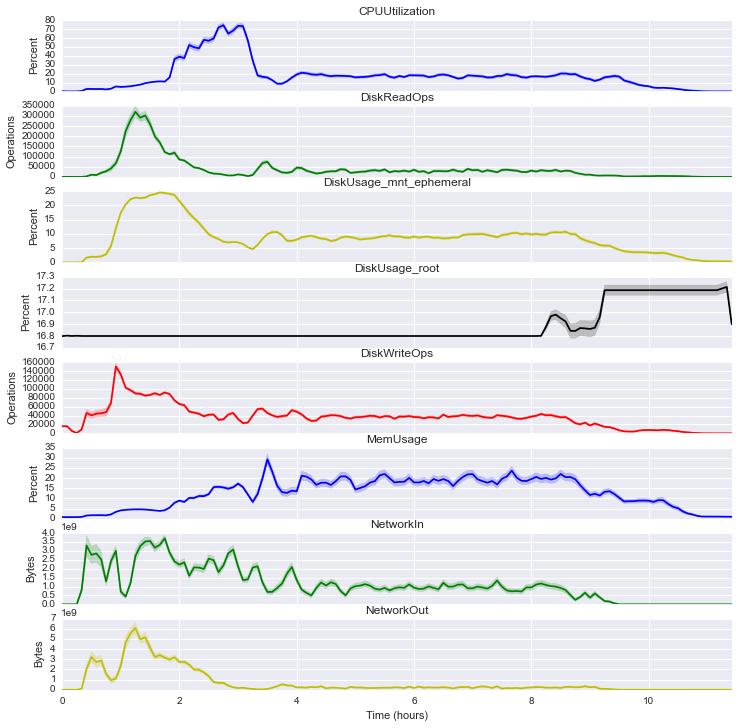

UUID: 6d04a020-dfc1-4b7f-8b93-60d867ec5a49

Number of Samples: 2530

Number of Nodes: 100

Cluster Name: scaling-gtex-400

Source Bucket: gtex-data

Average Hourly Cost: $0.564618631179

Cost per Instance: $6.45829610963

Availability Zone: us-west-2b

Start Time: 2016-02-01T22:07:32.575913

Stop Time: 2016-02-02T09:33:26.584420

Total Cost of Cluster: $645.829610963

Cost Per Sample: $0.255268620934
c437bdb2-ba2a-42fc-a75d-88587bea93e0_2016-01-30_scaling-gtex-1/CPUUtilization.csv
c437bdb2-ba2a-42fc-a75d-88587bea93e0_2016-01-30_scaling-gtex-1/DiskReadOps.csv
c437bdb2-ba2a-42fc-a75d-88587bea93e0_2016-01-30_scaling-gtex-1/DiskUsage_mnt_ephemeral.csv
c437bdb2-ba2a-42fc-a75d-88587bea93e0_2016-01-30_scaling-gtex-1/DiskUsage_root.csv
c437bdb2-ba2a-42fc-a75d-88587bea93e0_2016-01-30_scaling-gtex-1/DiskWriteOps.csv
c437bdb2-ba2a-42fc-a75d-88587bea93e0_2016-01-30_scaling-gtex-1/MemUsage.csv
c437bdb2-ba2a-42fc-a75d-88587bea93e0_2016-01-30_scaling-gtex-1/NetworkIn.csv
c437bdb2-ba2a-42fc-a75d-88587

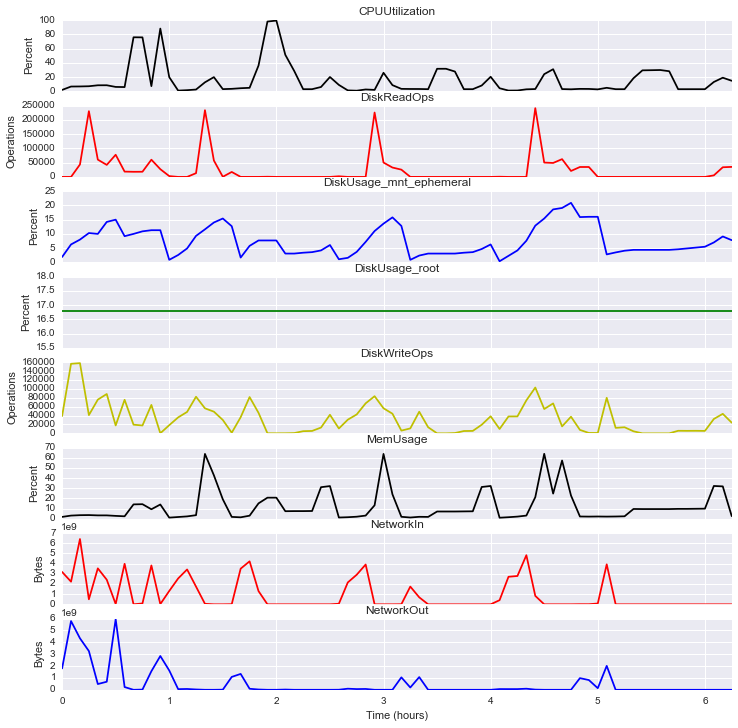

UUID: c437bdb2-ba2a-42fc-a75d-88587bea93e0

Number of Samples: 3

Number of Nodes: 1

Cluster Name: scaling-gtex-1

Source Bucket: gtex-data

Average Hourly Cost: $0.378

Cost per Instance: $2.67

Availability Zone: us-west-2a

Total Cost of Cluster: $2.67

Cost Per Sample: $0.89


In [41]:
colors = itertools.cycle(["r", "b", "g", 'y', 'k'])

ylabels = ['Percent', 'Operations', 'Percent', 'Percent', 
           'Operations', 'Percent', 'Bytes', 'Bytes']

for m in metrics:
    metric_info = zip(metrics[m], ylabels)
    f, axes = plt.subplots(len(metric_info), sharex=True, figsize=(12, 12))
    for i, mi in enumerate(metric_info):
        metric, ylabel = mi 
        print metric
        df = pd.read_csv(metric, header=None)
        df.fillna(method='pad', inplace=True)
        sns.tsplot(np.array(df), time=[x*5.0/60 for x in xrange(len(df.loc[0]))], 
                   ax=axes[i], color=next(colors))
        axes[i].set_title(metric.rsplit('/', 1)[1].split('.')[0])
        axes[i].set_ylabel(ylabel)
    axes[-1].set_xlabel('Time (hours)')
    plt.show()
    with open(os.path.join(os.path.split(metric)[0], 'run_report.txt')) as f:
        print '\n'.join(f.readlines())

In [40]:
# list_of_metrics = [(x, y) for x, y in list_of_metrics if x in metrics]
# Ensure all metrics are the same size
# limit = sys.maxint
# num_instances = 0
# for metric in metrics:
#     metrics[metric] = trim_lists(metrics[metric])
#     if limit > len(metrics[metric][0]):
#         limit = len(metrics[metric][0])
# assert limit > 1, 'Time Series plot cannot be made with only one time point. Wait a few minutes and try again.'
# for metric in metrics:
#     metrics[metric] = [x[:limit] for x in metrics[metric]]
#     num_instances = len(metrics[metric])
#     metrics[metric] = np.array(metrics[metric])
# Plot
# colors = itertools.cycle(["r", "b", "g", 'y', 'k'])
# time = [x*5.0 / 60 for x in xrange(limit)]
# f, axes = plt.subplots(len(metrics), sharex=True)
# for i, metric_info in enumerate(list_of_metrics):
#     metric, ylabel = metric_info
#     time = [x*5.0 / 60 for x in xrange(len(metrics[metric][0]))]
#     num_instances = len(metrics[metric])
#     sns.tsplot(data=metrics[metric], time=time, ax=axes[i], color=next(colors))
#     axes[i].set_title(metric.rsplit('/', 1)[1])
#     axes[i].set_ylabel(ylabel)
# axes[-1].set_xlabel('Time (hours)')
# f.suptitle('Aggregate Resources for {} Instances\n{} Samples ~ {} TB'.format(
#     num_instances, num_samples, sample_size), fontsize=14)
# plt.show()
# Fix spacing by modifying defaultSize and doubling as opposed to setting arbitrary figsize
# default_size = f.get_size_inches()
# f.set_size_inches(default_size[0]*2.5, default_size[1]*2.5)
# plt.savefig('{}_{}/Metrics_for_{}_nodes.svg'.format(uuid, str(datetime.utcnow()).split()[0], num_instances),
#             format='svg', dpi=600)